In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [2]:
class KMeans():
    
    def __init__(self, K, max_iters = 100, plot_steps = False):
        self.k = K
        self.max_iter = max_iters
        self.plot_steps = plot_steps
        
        self.clusters = [[] for _ in range(self.k)]
        self.centroids = []
        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        random_sample_index = np.random.choice(self.n_samples, self.k, replace = True)
        self.centroids = [self.X[index] for index in random_sample_index]
        
        for _ in range(self.max_iter):
            self.clusters = self._create_clusters(X, self.centroids)
            
            if self.plot_steps:
                self.plot()
                
            centroid_old = self.centroids
            self.centroids = self._update_centroids(self.clusters)
            
            diff = self.centroids - centroid_old
            if not(diff.any()):
                break
                
     
        return self._get_cluster_labels(self.clusters)
    
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
                
        return labels
            
    def _create_clusters(self, X, centroids):
        clusters = [[] for _ in range(self.k)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(np.sqrt(np.sum((point - centroids)** 2, axis = 1)))
            clusters[closest_centroid].append(point_idx)
            
        return clusters
        
    def _update_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
     
        
    def plot(self):
        fig, ax = plt.subplots(figsize=(6, 4))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

(1000, 2)
3


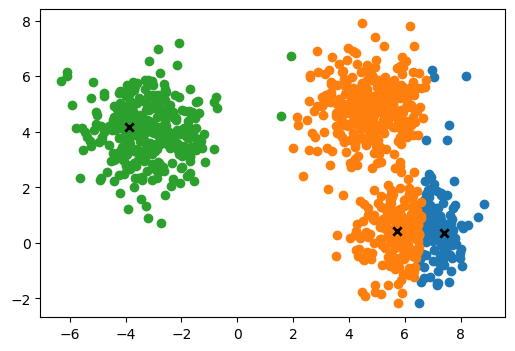

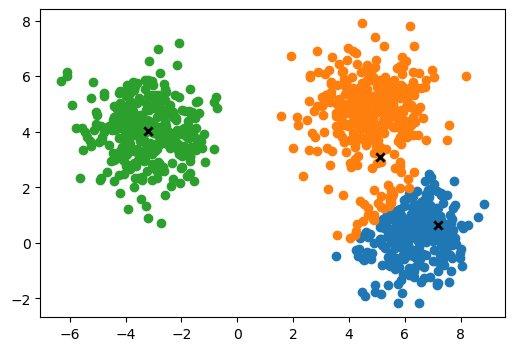

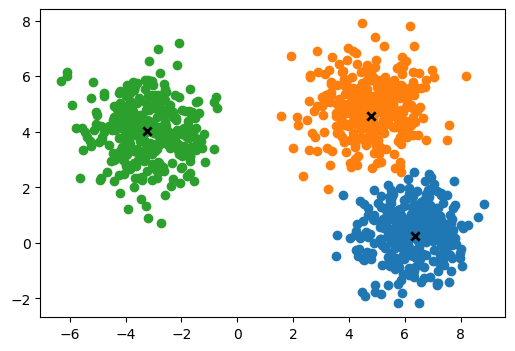

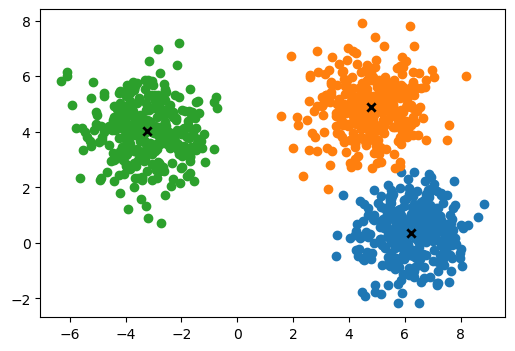

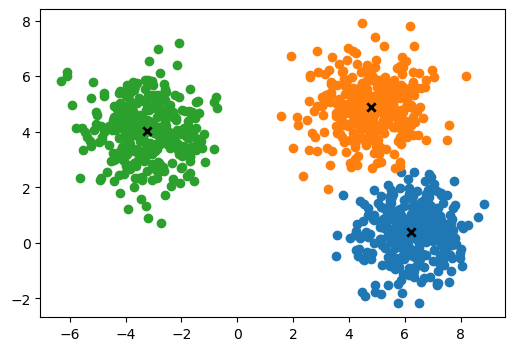

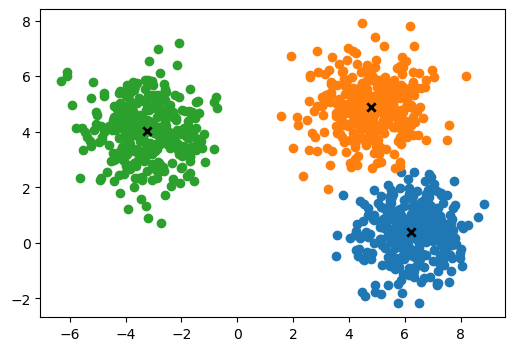

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 3)

print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()